# Introduction

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.

The purpose of this project is to build a classifier that can predict the condition of a water well, given information about the sort of pump, when it was installed, etc. Our audience is the Government of Tanzania which is looking to find patterns in non-functional wells in order to influence how new wells are built. 

Note that this is a ternary classification problem by default, but can be engineered to be binary.

# Lets get started

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

### Tuning Pandas

In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',None)

# Data Undertsanding

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzanian Ministry of Water.

Learn More here https://taarifa.org/

In [3]:
#Reading files
X_train=pd.read_csv('data/trainingsetvalues.csv')
y_train=pd.read_csv('data/trainingsetlabels.csv')
#Merging files
df=pd.merge(X_train,y_train,on='id')
#Displaying first five rows
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


We are provided the following set of information about the waterpoints:

`amount_tsh - Total static head (amount water available to waterpoint)`

`date_recorded - The date the row was entered`

`funder - Who funded the well`

`gps_height - Altitude of the well`

`installer - Organization that installed the well`

`longitude - GPS coordinate`

`latitude - GPS coordinate`

`wpt_name - Name of the waterpoint if there is one`

`num_private -`

`basin - Geographic water basin`

`subvillage - Geographic location`

`region - Geographic location`

`region_code - Geographic location (coded)`

`district_code - Geographic location (coded)`

`lga - Geographic location`

`ward - Geographic location`

`population - Population around the well`

`public_meeting - True/False`

`recorded_by - Group entering this row of data`

`scheme_management - Who operates the waterpoint`

`scheme_name - Who operates the waterpoint`

`permit - If the waterpoint is permitted`

`construction_year - Year the waterpoint was constructed`

`extraction_type - The kind of extraction the waterpoint uses`

`extraction_type_group - The kind of extraction the waterpoint uses`

`extraction_type_class - The kind of extraction the waterpoint uses`

`management - How the waterpoint is managed`

`management_group - How the waterpoint is managed`

`payment - What the water costs`

`payment_type - What the water costs`

`water_quality - The quality of the water`

`quality_group - The quality of the water`

`quantity - The quantity of water`

`quantity_group - The quantity of water`

`source - The source of the water`

`source_type - The source of the water`

`source_class - The source of the water`

`waterpoint_type - The kind of waterpoint`

`waterpoint_type_group - The kind of waterpoint`


# Exploratory Data Analysis

In [4]:
#(Number of rows,number of columns)
df.shape

(59400, 41)

In [5]:
#Overall Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
#Basic Data Statistics
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
#Unique Target Variables
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [8]:
#Null Values
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Preprocessing

## Encoding and Imputing All Categorical Features

In [9]:
#Initializing Encoder
encoder = OrdinalEncoder()

#Extracting Categorical Data
categorical_data=df.select_dtypes('object')
categorical_columns=categorical_data.columns

#Defining Encoder Function
def encode_data(col_data):
    #function to encode non-null data and replace it in the original data
    non_nulls=np.array(col_data.dropna())
    #reshaping the data for encoding
    reshaped_data=non_nulls.reshape(-1,1)
    #encoding
    encoded_data=encoder.fit_transform(reshaped_data)
    #replace data
    col_data.loc[col_data.notnull()]=np.squeeze(encoded_data)
    return col_data

#Defining Imputer Function
def impute_data(col_data):
    col_data.fillna(col_data.value_counts().index[0], inplace=True)
    return col_data

#Transforming Data
for column in categorical_columns:
    encode_data(categorical_data[column])
    impute_data(categorical_data[column])
categorical_data

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,47.0,1369.0,1518.0,37399.0,1.0,11807.0,3.0,51.0,1426.0,1.0,0.0,7.0,2245.0,0.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0.0
1,309.0,469.0,545.0,37195.0,4.0,15838.0,9.0,103.0,1576.0,1.0,0.0,2.0,598.0,1.0,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,0.0
2,300.0,825.0,2048.0,14572.0,5.0,9074.0,8.0,108.0,1624.0,1.0,0.0,7.0,2121.0,1.0,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
3,272.0,1741.0,1852.0,37285.0,7.0,8982.0,12.0,87.0,1571.0,1.0,0.0,7.0,598.0,1.0,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0
4,104.0,20.0,119.0,35529.0,4.0,7698.0,4.0,26.0,1687.0,1.0,0.0,7.0,598.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,338.0,436.0,201.0,513.0,5.0,5681.0,6.0,16.0,1090.0,1.0,0.0,10.0,1068.0,1.0,3.0,1.0,0.0,9.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0.0
59396,90.0,177.0,265.0,24074.0,6.0,2980.0,3.0,91.0,353.0,1.0,0.0,7.0,479.0,1.0,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,6.0,4.0,1.0,1.0,1.0,0.0
59397,75.0,456.0,390.0,27926.0,6.0,8784.0,10.0,59.0,177.0,1.0,0.0,7.0,598.0,0.0,15.0,11.0,1.0,7.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,4.0,3.0,0.0
59398,41.0,884.0,1213.0,29693.0,6.0,14012.0,2.0,11.0,1449.0,1.0,0.0,7.0,598.0,1.0,8.0,5.0,1.0,7.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,7.0,5.0,0.0,4.0,3.0,0.0


In [10]:
#Null values
categorical_data.isnull().sum()

date_recorded            0
funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

## Checking Numeric Features and Updating DataFrame

In [11]:
#Extracting numeric data
numeric_data=df.select_dtypes(['float64','int64'])
#Checking null values
numeric_data.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [12]:
#Updating DataFrame
df[categorical_columns]=categorical_data
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,47.0,1369.0,1390,1518.0,34.938093,-9.856322,37399.0,0,1.0,11807.0,3.0,11,5,51.0,1426.0,109,1.0,0.0,7.0,2245.0,0.0,1999,3.0,1.0,0.0,7.0,4.0,2.0,0.0,6.0,2.0,1.0,1.0,8.0,6.0,0.0,1.0,1.0,0.0
1,8776,0.0,309.0,469.0,1399,545.0,34.698766,-2.147466,37195.0,0,4.0,15838.0,9.0,20,2,103.0,1576.0,280,1.0,0.0,2.0,598.0,1.0,2010,3.0,1.0,0.0,11.0,4.0,0.0,2.0,6.0,2.0,2.0,2.0,5.0,3.0,1.0,1.0,1.0,0.0
2,34310,25.0,300.0,825.0,686,2048.0,37.460664,-3.821329,14572.0,0,5.0,9074.0,8.0,21,4,108.0,1624.0,250,1.0,0.0,7.0,2121.0,1.0,2009,3.0,1.0,0.0,7.0,4.0,4.0,5.0,6.0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0
3,67743,0.0,272.0,1741.0,263,1852.0,38.486161,-11.155298,37285.0,0,7.0,8982.0,12.0,90,63,87.0,1571.0,58,1.0,0.0,7.0,598.0,1.0,1986,14.0,10.0,5.0,7.0,4.0,0.0,2.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,2.0
4,19728,0.0,104.0,20.0,0,119.0,31.130847,-1.825359,35529.0,0,4.0,7698.0,4.0,18,1,26.0,1687.0,0,1.0,0.0,7.0,598.0,1.0,0,3.0,1.0,0.0,1.0,1.0,0.0,2.0,6.0,2.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,0.0


## Standardizing Features

In [13]:
#Importing Function
from sklearn.preprocessing import StandardScaler
#Scaling data
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,1.512933,1.895665,-1.218793,0.988022,1.041252,1.430269,0.131052,-1.408791,1.356556,-0.038749,-1.244276,0.395535,-1.151388,-0.244325,-0.065370,-0.256493,0.620196,-0.150399,0.304987,0.0,-0.115419,1.837750,-1.547850,0.733857,-0.790543,-0.832581,-0.777459,-0.134813,0.341576,-0.140018,-1.547906,0.272762,-0.335408,-0.405301,-0.405301,0.952132,0.925935,-0.538410,-0.883614,-0.765967,-0.885633
1,-1.320990,-0.105970,1.188774,-0.607329,1.054237,-0.316377,0.094610,1.207934,1.339574,-0.038749,-0.031205,1.131907,-0.140749,0.267409,-0.376781,1.218927,0.872193,0.212290,0.304987,0.0,-2.811818,-0.573209,0.646058,0.745416,-0.790543,-0.832581,-0.777459,1.820837,0.341576,-1.020594,-0.458639,0.272762,-0.335408,0.838878,0.838878,-0.522669,-0.442816,1.765074,-0.883614,-0.765967,-0.885633
2,-0.130757,-0.097630,1.106072,0.023721,0.025541,2.381679,0.515158,0.639751,-0.543605,-0.038749,0.373152,-0.103721,-0.309189,0.324269,-0.169174,1.360795,0.952832,0.148660,0.304987,0.0,-0.115419,1.656233,0.646058,0.744365,-0.790543,-0.832581,-0.777459,-0.134813,0.341576,0.740559,1.175263,0.272762,-0.335408,-0.405301,-0.405301,-2.980671,-1.355317,1.765074,-0.322265,-0.765967,-0.885633
3,1.427676,-0.105970,0.848774,1.647433,-0.584751,2.029837,0.671308,-1.849720,1.347066,-0.038749,1.181867,-0.120527,0.364570,4.247564,5.955245,0.764952,0.863793,-0.258570,0.304987,0.0,-0.115419,-0.573209,0.646058,0.720196,1.819858,1.719132,2.296319,-0.134813,0.341576,-1.020594,-0.458639,0.272762,-0.335408,-1.649479,-1.649479,-1.505870,-1.811567,-0.538410,-0.322265,-0.765967,1.220105
4,-0.810478,-0.105970,-0.695009,-1.403231,-0.964200,-1.081096,-0.448669,1.317271,1.200893,-0.038749,-0.031205,-0.355085,-0.982948,0.153691,-0.480585,-0.965829,1.058670,-0.381587,0.304987,0.0,-0.115419,-0.573209,0.646058,-1.366788,-0.790543,-0.832581,-0.777459,-3.068289,-2.492435,-1.020594,-0.458639,0.272762,-0.335408,2.083056,2.083056,-0.522669,-0.442816,1.765074,-0.883614,-0.765967,-0.885633


## Dropping `id` Column in preparation for modeling

In [14]:
df.drop('id',axis=1,inplace=True)
df[:1]

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,1.895665,-1.218793,0.988022,1.041252,1.430269,0.131052,-1.408791,1.356556,-0.038749,-1.244276,0.395535,-1.151388,-0.244325,-0.06537,-0.256493,0.620196,-0.150399,0.304987,0.0,-0.115419,1.83775,-1.54785,0.733857,-0.790543,-0.832581,-0.777459,-0.134813,0.341576,-0.140018,-1.547906,0.272762,-0.335408,-0.405301,-0.405301,0.952132,0.925935,-0.53841,-0.883614,-0.765967,-0.885633


# Building, Tuning and Evaluating Models

In [15]:
#Performing a train-test split
from sklearn.model_selection import train_test_split
X=df.drop('status_group',axis=1)
y=df['status_group'].astype(int)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.4)

> We will be using GridSearchCV as our hyperparameter tuning method and accuracy score as our evaluation metric

In [16]:
# Importing Tools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
rs=11

In [17]:
# Function for fitting and testing
def fit_and_test(model):
    model.fit(X_train,y_train)
    #Making Predictions
    train_predictions=model.predict(X_train)
    test_predictions=model.predict(X_test)
    #Computing Accuracy
    train_accuracy=accuracy_score(y_train,train_predictions)
    test_accuracy=accuracy_score(y_test,test_predictions)

    print(f'{str(model)} Results: \
    \n Train Accuracy: {train_accuracy}\
    \n Test Accuracy: {test_accuracy}')
    
# Function for hyperparameter tuning
def find_params(model,param_grid):
    model_cv=GridSearchCV(model,param_grid,cv=5)
    model_cv.fit(X_train,y_train)
    params=model_cv.best_params_
    values=list(params.values())
    return (values[i] for i in range(len(values)))

## MultiClass Logistic Regressor

`Vanilla`

In [18]:
#Importing modules
from sklearn.linear_model import LogisticRegression
#Initializing Model
logistic_model=LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=rs)
#Fitting and Testing Model
fit_and_test(logistic_model)

LogisticRegression(multi_class='multinomial', random_state=11) Results:     
 Train Accuracy: 0.7056397306397306    
 Test Accuracy: 0.7114057239057239


`Tuned`

In [19]:
# lg_param_grid = {'C': [1,5], 
#               'max_iter': [100, 500], 
#               'tol': [0.0001]}
# #Extracting Optimal Parameters
# c,m,t=find_params(logistic_model,lg_param_grid)
# #Building Tuned Model
# tuned_logistic_model=LogisticRegression(C=c,max_iter=m,tol=t)
# #Fitting and Testing Model
# fit_and_test(tuned_logistic_model)

## Decision Tree Classifier

`Vanilla`

In [20]:
#Importing functions
from sklearn.tree import DecisionTreeClassifier
#Initializing Model
decision_tree_model=DecisionTreeClassifier(max_depth=14)
#Fitting and Testing Model
fit_and_test(decision_tree_model)

DecisionTreeClassifier(max_depth=14) Results:     
 Train Accuracy: 0.871324354657688    
 Test Accuracy: 0.8182239057239057


`Tuned`

In [21]:
# dt_param_grid = {'criterion': ['entropy','gini'],
#                  'min_samples_split': [20,26]}
# c,ms=find_params(decision_tree_model,dt_param_grid)
# #Building Tuned Model
# tuned_decision_tree_model=DecisionTreeClassifier(criterion=c,min_samples_split=ms)
# #Fitting and Testing Model
# fit_and_test(tuned_decision_tree_model)

## K-Nearest Neighbors

`Vanilla`

In [22]:
#Importing Functions
from sklearn.neighbors import KNeighborsClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
#Initializing model
knn_model=KNeighborsClassifier(n_neighbors=5)
#Fitting and Testing Model
fit_and_test(knn_model)

KNeighborsClassifier() Results:     
 Train Accuracy: 0.8656285072951739    
 Test Accuracy: 0.8058080808080809


`Tuned`

In [23]:
# kn_param_grid = {'n_neighbors': [3, 5, 7],
#                  'weights': ['uniform', 'distance']}
# n,w=find_params(knn_model,kn_param_grid)
# #Building tuned model
# tuned_knn_model=KNeighborsClassifier(n_neighbors=n,weights=w)
# #Fitting and Testing Model
# fit_and_test(tuned_knn_model)

## Random Forest

`Vanilla`

In [24]:
#Importing Function
from sklearn.ensemble import RandomForestClassifier
#Initializing Model
forest_model=RandomForestClassifier()
#Fitting and Testing Model
fit_and_test(forest_model)

RandomForestClassifier() Results:     
 Train Accuracy: 0.9999719416386083    
 Test Accuracy: 0.8605218855218856


`Tuned`

In [25]:
# rf_param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth' : [40,80]
# }
# n,mf,md,c=find_params(forest_model,rf_param_grid)
# #Building Tuned Model
# tuned_forest_model = RandomForestClassifier(n_estimators=n,max_features=mf,max_depth=md,criterion=c)
# #Fitting and Testing Model
# fit_and_test(tuned_forest_model)

## Bayesian Classifier

`Vanilla`

In [26]:
#Importing module
from sklearn.naive_bayes import GaussianNB
#Initializing model
bayes_model=GaussianNB()
#Fitting and Testing Model
fit_and_test(bayes_model)

GaussianNB() Results:     
 Train Accuracy: 0.6661335578002244    
 Test Accuracy: 0.6731481481481482


`Tuned`

In [27]:
# bayes_param_grid = {
#     'var_smoothing': np.logspace(0,-9, num=100)
# }
# var=find_params(bayes_model,bayes_param_grid)
# #Building Tuned Model
# tuned_bayes_model=GaussianNB(var_smoothing=var)
# #Fitting and Testing Model
# fit_and_test(tuned_bayes_model)

## Adaptive Boosting Classifier

`Vanilla`

In [28]:
#Importing module
from sklearn.ensemble import AdaBoostClassifier
#Initializing model
adaboost_model=AdaBoostClassifier()
#Fitting and Testing Model
fit_and_test(adaboost_model)

AdaBoostClassifier() Results:     
 Train Accuracy: 0.7926206509539843    
 Test Accuracy: 0.7922138047138048


`Tuned`

In [29]:
# ab_param_grid = {
#     'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1],
# }
# b,n,l=find_params(adaboost_model,ab_param_grid)
# #Building tuned model
# tuned_adaboost_model=AdaBoostClassifier(base_estimator=b,n_estimators=n,learning_rate=l)
# #Fitting and testing Model
# fit_and_test(tuned_adaboost_model)

## Extra Trees Classifier

`Vanilla`

In [30]:
#Importing Module
from sklearn.ensemble import ExtraTreesClassifier
#Initializing model
extra_trees_model=ExtraTreesClassifier()
#Fitting and Testing Model
fit_and_test(extra_trees_model)

ExtraTreesClassifier() Results:     
 Train Accuracy: 1.0    
 Test Accuracy: 0.8518097643097643


`Tuned`

In [31]:
# et_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [1, 2, 3],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2],
# }
# n,md,ms,ml=find_params(extra_trees_model,et_param_grid)
# #Building Tuned Model
# tuned_extra_trees_model=ExtraTreesClassifier(n_estimators=n,max_depth=md,min_samples_split=ms,min_samples_leaf=ml)
# #Fitting and Testing Model
# fit_and_test(tuned_extra_trees_model)

## Gradient Boosting Classifier

`Vanilla`

In [32]:
#Importing module
from sklearn.ensemble import GradientBoostingClassifier
#Initializing model
gradient_boost_model=GradientBoostingClassifier()
#Fitting Data
fit_and_test(gradient_boost_model)

GradientBoostingClassifier() Results:     
 Train Accuracy: 0.8087822671156004    
 Test Accuracy: 0.8058922558922559


`Tuned`

In [33]:
# gb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [1, 2, 3],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2],
# }
# n,md,ms,ml=find_params(gradient_boost_model,gb_param_grid)
# #Building Tuned Model
# tuned_gradient_boost_model=GradientBoostClassifier(n_estimators=n,max_depth=md,min_samples_split=ms,min_samples_leaf=ml)
# #Fitting and Testing model
# fit_and_test(tuned_gradient_boost_model)

# Model Selection

## ROC and AUC
#### (Receiver Operating Characteristics)

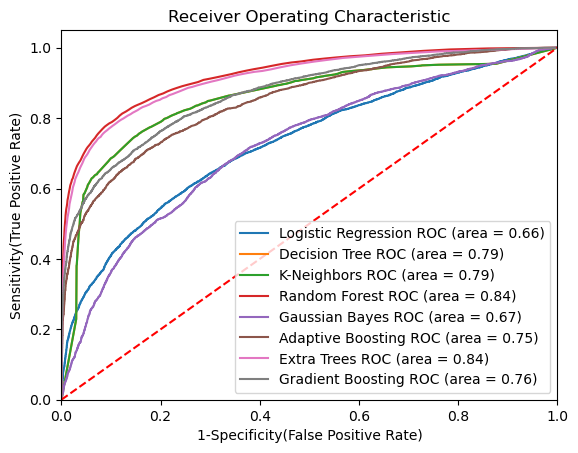

In [34]:
#Importing Module
import sklearn.metrics as metrics
#Listing models
models = [
    { 'label': 'Logistic Regression', 'model': logistic_model},
    { 'label': 'Decision Tree', 'model': decision_tree_model},
    { 'label': 'K-Neighbors', 'model': decision_tree_model},
    { 'label': 'Random Forest', 'model': forest_model},
    { 'label': 'Gaussian Bayes', 'model': bayes_model},
    { 'label': 'Adaptive Boosting', 'model': adaboost_model},
    { 'label': 'Extra Trees', 'model': extra_trees_model},
    { 'label': 'Gradient Boosting', 'model': gradient_boost_model}
]
#Plotting ROC
plt.figure()
for m in models:
    model = m['model'] # select the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,y_pred)
# Now, plotting the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

> The **Random Forests** model has the highest `AUC` (0.84) as well as the highest `accuracy score`(86%). We shall therefore be selecting it as our final and best model. **Our model of choice**

# Pickling the model

In [35]:
import pickle
import joblib

# Save the model as a pickle in a file
joblib.dump(forest_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Recommendation

With such predictive power, the Government of Tanzania can now forecast and infer the condition of a water well. We therefore recommend the utilization of this algorithm to improve operational efficiency

# Conclusion

More and more businesses are leveraging on the use of data and machine learning to drive decision making. It has been an honor working with the Tanzanian Government. When we work together we grow together